## Edge Detection with Python and Pillow (PIL)

In [1]:
import numpy as np
from PIL import Image, ImageOps, ImageFilter
import requests
from io import BytesIO
import matplotlib.pyplot as plt


### Preprocessing Functions

In [2]:
def fetch_image_from_url(url):
    """
    Fetches an image from the given URL.

    Args:
        url (str): URL of the image to fetch.

    Returns:
        Image: An Image object if successful, None otherwise.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except requests.RequestException as e:
        print(f"Error fetching image from URL: {e}")
        return None

def display_image(image, title="Image"):
    """
    Displays an image using matplotlib.

    Args:
        image (Image): The Image object to display.
        title (str): Title of the displayed image. Default is "Image".
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def convert_to_grayscale(image):
    """
    Converts an image to grayscale.

    Args:
        image (Image): The Image object to convert.

    Returns:
        Image: The converted grayscale Image object.
    """
    return ImageOps.grayscale(image)

def apply_edge_detection(image):
    """
    Applies edge detection to a grayscale image.

    Args:
        image (Image): The grayscale Image object to process.

    Returns:
        Image: The Image object after edge detection.
    """
    return image.filter(ImageFilter.FIND_EDGES)

### Main Function

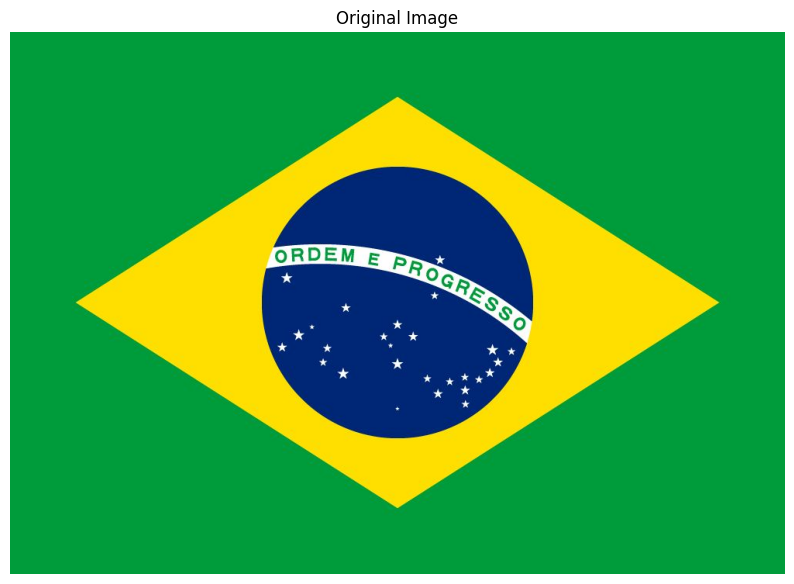

In [16]:
"""
fetch an image, convert it to grayscale, apply edge detection,
and display the original and processed images.
"""

# img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29.svg/langfr-225px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29.svg.png"
# img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Flag_of_the_United_States.svg/1200px-Flag_of_the_United_States.svg.png"
img_url = "https://www.countryflags.com/wp-content/uploads/brazil-flag-png-large.png"

image = fetch_image_from_url(img_url)

display_image(image, "Original Image")


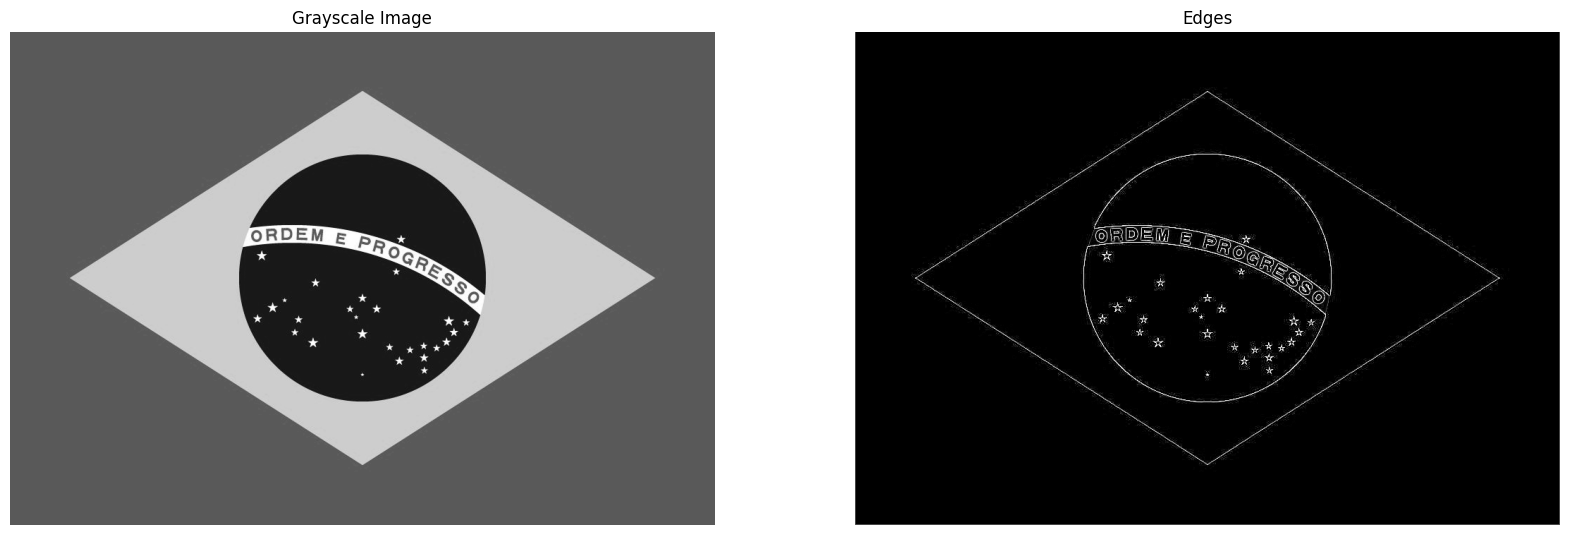

In [17]:
# if __name__ == "__main__":

gray_image = convert_to_grayscale(image)
edges_image = apply_edge_detection(gray_image)

# Display the grayscale and edges images
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_image, cmap='gray')
plt.title("Edges")
plt.axis('off')

plt.show()

## References
- Real Python: https://realpython.com/image-processing-with-the-python-pillow-library/#edge-detection-edge-enhancement-and-embossing
- Geeks for Geeks: https://www.geeksforgeeks.org/python-edge-detection-using-pillow/